In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

In [ ]:

pf=pd.read_csv('/content/drive/MyDrive/datasets/project file 2 - Sheet1 (5).csv')
#pf = pf.replace(r'^\s*$', np.nan, regex=True)
pf.set_index("DATE", inplace=True)
#CAGR RATIOS
print(pf.head())
!pip install yfinance
# NASDAQ STATISTICAL ANALYTICS
import yfinance as yf
import plotly.graph_objs as go
nasdaq=yf.download(tickers='^IXIC',start='2018-01-02',end='2021-12-30',interval='1d')


             check   IPRICE  CHANGE
DATE                               
1/2/2018    999.99  1000.00    0.00
1/3/2018  1,006.66  1006.67    0.67
1/4/2018  1,010.67  1010.68    0.40
1/5/2018  1,024.06  1024.07    1.32
1/8/2018  1,026.83  1026.84    0.27
[*********************100%***********************]  1 of 1 completed


In [ ]:


p0=3480;p1=2721;p2=1589;p3=999
inii=1000 
t0=4;t1=3;t2=2;t3=1
CAGR0=(((p0/inii)**(1/t0))-1)*100
CAGR1=(((p1/inii)**(1/t1))-1)*100
CAGR2=(((p2/inii)**(1/t2))-1)*100
CAGR3=(((p3/inii)**(1/t3))-1)*100
print('1.0 CUMULATIVE ANNUAL GROWTH RETURN FROM 2018 TO 2022 IS ',CAGR0,"%")
print('1.1 CUMULATIVE ANNUAL GROWTH RETURN FROM 2018 TO 2021 IS ',CAGR1,"%")
print('1.2 CUMULATIVE ANNUAL GROWTH RETURN FROM 2018 TO 202O IS ',CAGR2,"%")
print('1.3 CUMULATIVE ANNUAL GROWTH RETURN FROM 2018 TO 2019 IS ',CAGR3,"%")
#CAGR RATIOS
k0=15766.22;k1=12888.280273437;k2=8972.60;k3=6635.28
inii=7006.9
investment=1000
units=investment/7006.8999
l0=4;l1=3;l2=2;l3=1
CAGR0=(((k0/inii)**(1/l0))-1)*100
CAGR1=(((k1/inii)**(1/l1))-1)*100
CAGR2=(((k2/inii)**(1/l2))-1)*100
CAGR3=(((k3/inii)**(1/l3))-1)*100
print('1.0 CUMULATIVE ANNUAL GROWTH RETURN OF NASDAQ FROM 2018 TO 2022 IS ',CAGR0,"%")
print('1.1 CUMULATIVE ANNUAL GROWTH RETURN OF NASDAQ FROM 2018 TO 2021 IS ',CAGR1,"%")
print('1.2 CUMULATIVE ANNUAL GROWTH RETURN OF NASDAQ FROM 2018 TO 202O IS ',CAGR2,"%")
print('1.3 CUMULATIVE ANNUAL GROWTH RETURN OF NASDAQ FROM 2018 TO 2019 IS ',CAGR3,"%")

1.0 CUMULATIVE ANNUAL GROWTH RETURN FROM 2018 TO 2022 IS  36.58242239094176 %
1.1 CUMULATIVE ANNUAL GROWTH RETURN FROM 2018 TO 2021 IS  39.60774553839039 %
1.2 CUMULATIVE ANNUAL GROWTH RETURN FROM 2018 TO 202O IS  26.05554331325537 %
1.3 CUMULATIVE ANNUAL GROWTH RETURN FROM 2018 TO 2019 IS  -0.10000000000000009 %
1.0 CUMULATIVE ANNUAL GROWTH RETURN OF NASDAQ FROM 2018 TO 2022 IS  22.47583689378896 %
1.1 CUMULATIVE ANNUAL GROWTH RETURN OF NASDAQ FROM 2018 TO 2021 IS  22.524522162604477 %
1.2 CUMULATIVE ANNUAL GROWTH RETURN OF NASDAQ FROM 2018 TO 202O IS  13.160848160521855 %
1.3 CUMULATIVE ANNUAL GROWTH RETURN OF NASDAQ FROM 2018 TO 2019 IS  -5.303629279709998 %


In [ ]:

#MAX DRAWDOWN
pf['Peak'] = pf['IPRICE'].cummax()
pf['Drawdown'] = (pf['Peak']-pf['IPRICE'])/pf['Peak']
print(pf.tail())
print('Maximum Drawdown in pf is ', pf['Drawdown'].max())
#MAX DRAWDOWN
nasdaq['Peak']=nasdaq['Close'].cummax()
nasdaq['Drawdown']=(nasdaq['Peak']-nasdaq['Close'])/nasdaq['Peak']
print('maximum drawdown of nasdaq in 4 yrs is',nasdaq['Drawdown'].max())

               check   IPRICE  CHANGE     Peak  Drawdown
DATE                                                    
12/22/2021  3,480.77  3480.78    0.29  3576.53  0.026772
12/23/2021  3,485.03  3485.04    0.12  3576.53  0.025581
12/27/2021  3,488.99  3489.00    0.11  3576.53  0.024473
12/28/2021  3,488.56  3488.57   -0.01  3576.53  0.024594
12/29/2021  3,479.36  3479.37   -0.26  3576.53  0.027166
Maximum Drawdown in pf is  0.32414182028577926
maximum drawdown of nasdaq in 4 yrs is 0.30115673337317633


DATE
1/3/2018    0.006648
1/4/2018    0.003976
1/5/2018    0.013162
1/8/2018    0.002701
1/9/2018    0.000506
Name: Return, dtype: float64
Daily Sharpe Ratio is  0.06903235645001574
Yearly Sharpe Ratio is  1.0958546855010438


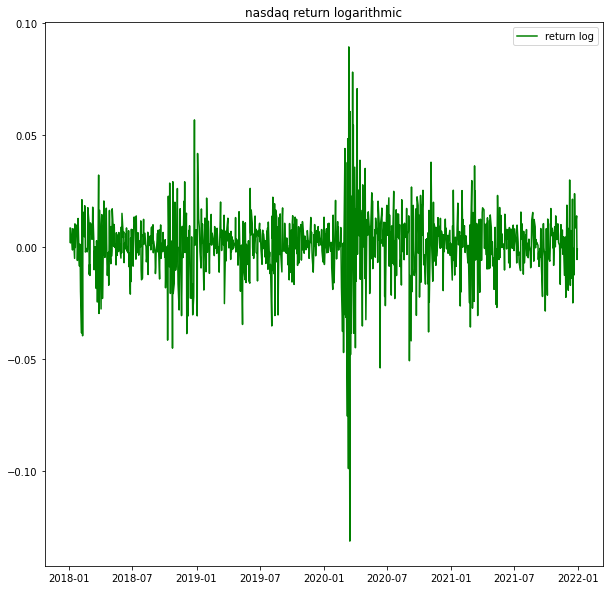

Date
2018-01-03    0.008333
2018-01-04    0.001751
2018-01-05    0.008252
2018-01-08    0.002915
2018-01-09    0.000864
Name: Return, dtype: float64
Daily Sharpe Ratio of nasdaq is  0.053464029578640535
Yearly Sharpe Ratio of nasdaq is  0.8487151581149056


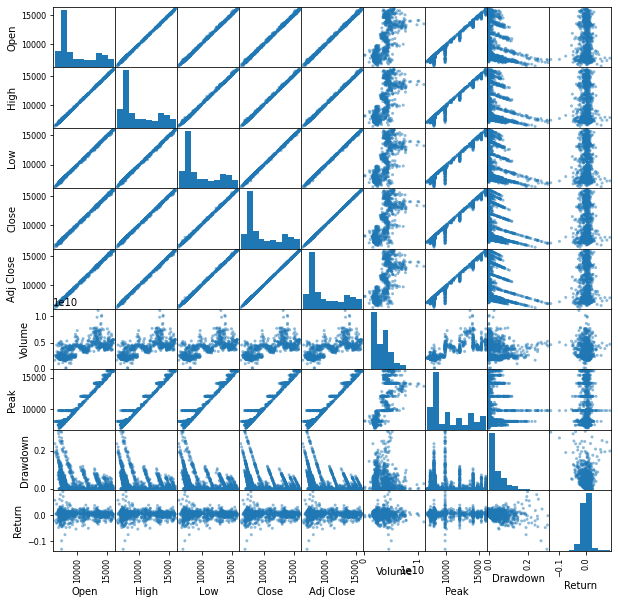

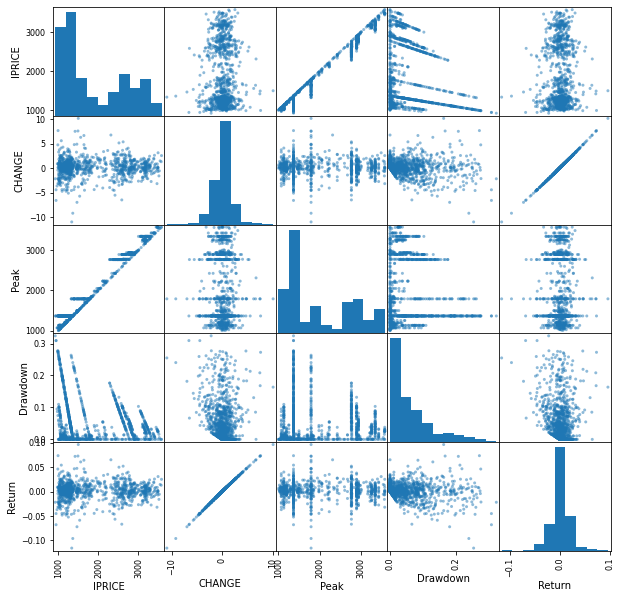

In [ ]:

#sharpe ratio
pf['Return'] = np.log(pf['IPRICE']) - np.log(pf['IPRICE'].shift(1))
dailyr = pf['Return'].dropna()
print(dailyr.head())
print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))
#sharpe ratio
nasdaq['Return'] = np.log(nasdaq['Close'])-np.log(nasdaq['Close'].shift(1))
plt.figure(figsize=(10,10))
plt.title('nasdaq return logarithmic')
plt.plot(nasdaq['Return'],color='g',label='return log')
plt.legend()
plt.show()
sm=scatter_matrix(nasdaq,figsize=(10,10))
sm1=scatter_matrix(pf,figsize=(10,10))
dailyr = nasdaq['Return'].dropna()
print(dailyr.head())
print('Daily Sharpe Ratio of nasdaq is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio of nasdaq is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

In [ ]:

#profit margin
initialinvestment=1000
unit=1
finalselloffvalue=3480
profitmargin=( finalselloffvalue-initialinvestment)*100/initialinvestment
print('profit margin for a time period of 4 yrs',profitmargin,'%')
#profit margin2
investment=1000
units=investment/7006.8999
sellvalue=15766.22*units
profitmargin1=(sellvalue-investment)*100/investment
print('profit margin for a time period of 4 yrs of nasdaq',profitmargin1,'%')

profit margin for a time period of 4 yrs 248.0 %
profit margin for a time period of 4 yrs of nasdaq 125.00992200559335 %


In [ ]:

nasdaq.tail()
print(pf.describe())
nasdaq.describe()

            IPRICE       CHANGE         Peak     Drawdown       Return
count  1006.000000  1006.000000  1006.000000  1006.000000  1005.000000
mean   1875.415616     0.140169  1988.017485     0.060917     0.001241
std     787.602939     1.792807   797.988503     0.066644     0.017972
min     922.810000   -10.930000  1000.000000     0.000000    -0.115705
25%    1214.277500    -0.607500  1365.390000     0.007723    -0.006079
50%    1487.280000     0.190000  1608.400000     0.039861     0.001867
75%    2625.130000     1.050000  2776.120000     0.088113     0.010448
max    3576.530000    10.110000  3576.530000     0.324142     0.096331


,Open,High,Low,Close,Adj Close,Volume,Peak,Drawdown,Return
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03,1006.000000,1006.000000,1005.000000
mean,9974.421617,10040.376610,9900.179340,9976.224190,9976.224190,3.357057e+09,10382.282924,0.041689,0.000807
std,2878.019163,2889.322524,2860.667823,2877.828960,2877.828960,1.510009e+09,2826.056950,0.050501,0.015093
min,6257.859863,6355.180176,6190.169922,6192.919922,6192.919922,1.494100e+08,7006.899902,0.000000,-0.131492
25%,7658.732666,7712.457520,7618.207520,7662.240112,7662.240112,2.129188e+09,8109.689941,0.005309,-0.004795
50%,8470.044922,8536.384766,8446.459961,8517.810059,8517.810059,2.698625e+09,9057.290039,0.023950,0.001480
75%,12842.170166,12907.739990,12687.894775,12796.325439,12796.325439,4.314762e+09,12899.419922,0.060540,0.008142
max,16120.919922,16212.230469,16017.230469,16057.440430,16057.440430,1.110216e+10,16057.440430,0.301157,0.089347


In [ ]:
!pip install yfinance
# NASDAQ STATISTICAL ANALYTICS
import yfinance as yf
import plotly.graph_objs as go
hindalco=yf.download(tickers='HINDALCO.NS',start='2018-01-02',end='2022-12-30',interval='1d')
hindalco



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,274.399994,274.399994,268.100006,271.899994,265.443909,4546324
2018-01-03,273.399994,279.350006,273.100006,276.500000,269.934692,7285874
2018-01-04,277.100006,281.299988,274.799988,279.799988,273.156311,10346774
2018-01-05,282.000000,284.000000,275.100006,276.399994,269.837067,7084973
2018-01-08,277.000000,279.049988,273.700012,276.149994,269.593048,4157464
...,...,...,...,...,...,...
2022-07-29,396.500000,416.799988,395.200012,415.049988,415.049988,15509534
2022-08-01,420.000000,428.000000,418.850006,424.000000,424.000000,15535311
2022-08-02,419.000000,420.500000,407.600006,418.399994,418.399994,15535733
